In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


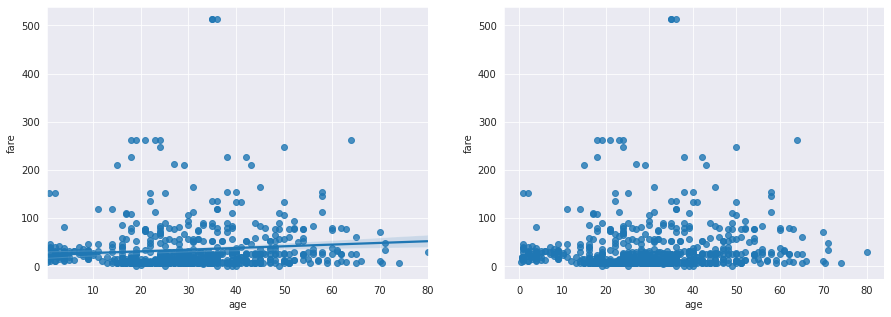

In [3]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


sns.regplot(x = 'age',
            y = 'fare',
            data = titanic,
            ax = ax1)
sns.regplot(x = 'age',
            y = 'fare',
            data = titanic,
            ax = ax2,
            fit_reg = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


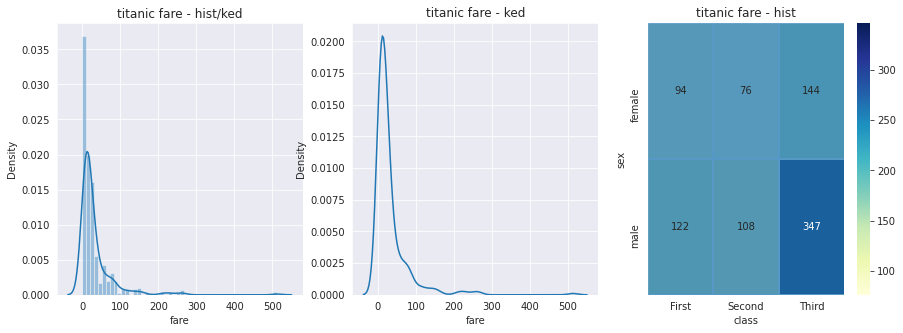

In [11]:

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'], ax = ax1)
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)
sns.histplot(x= 'fare', data = titanic, ax = ax3)

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')



table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')

sns.heatmap(table,
            annot = True, fmt = 'd', 
            cmap = 'YlGnBu',
            linewidth = .5,
            cbar = True)

plt.show()


범주형 데이터 산점도

범주형, 수치형을 나눠서 반드시 구분 해야 데이터셋을 어떻게 다룰 지 알 수 있음

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


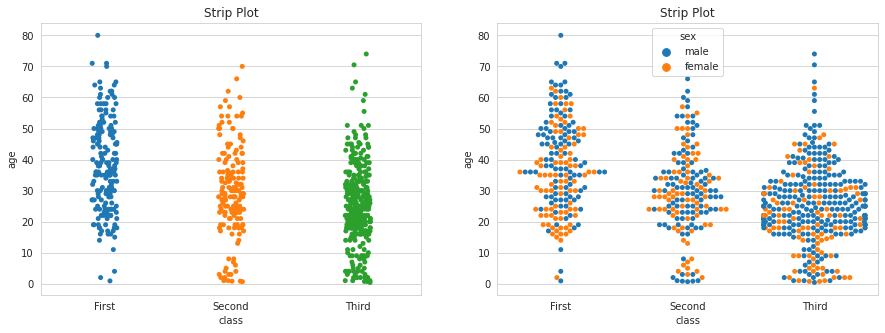

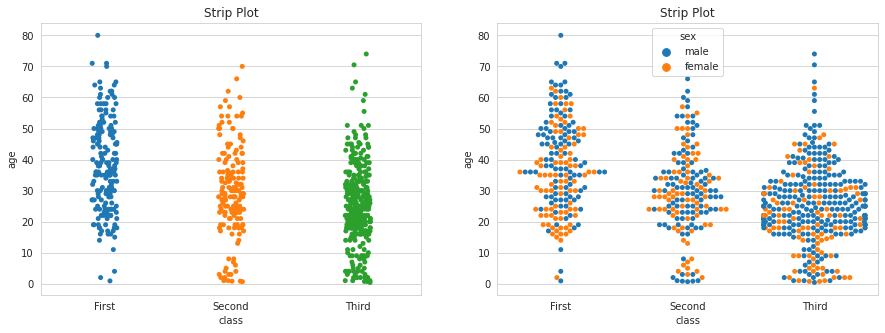

In [15]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


#이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x = 'class',
              y = 'age',
              data = titanic,
              ax = ax1)

#이산형 변수의 분포 - 데이터 분산 고려(중복 X)
sns.swarmplot(x = 'class',
              y = 'age',
              hue = 'sex',
              data = titanic,
              ax = ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show(())

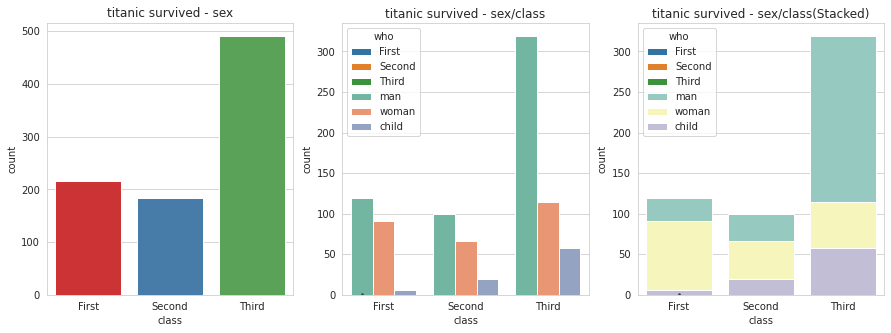

In [22]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#x, y 축에 변수 할당
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)

#x, y 축에 변수 할당 + hue 옵션 
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)


#x, y 축에 변수 할당 + hue 옵션 + 누적출력
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False, data = titanic, ax = ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(Stacked)')

sns.countplot(x = 'class',
              palette = 'Set1',
              data = titanic,
              ax = ax1)

sns.countplot(x = 'class',
              hue = 'who',
              palette = 'Set2',
              data = titanic,
              ax = ax2)


sns.countplot(x = 'class',
              hue = 'who',
              palette = 'Set3',
              dodge = False,
              data = titanic,
              ax = ax3)

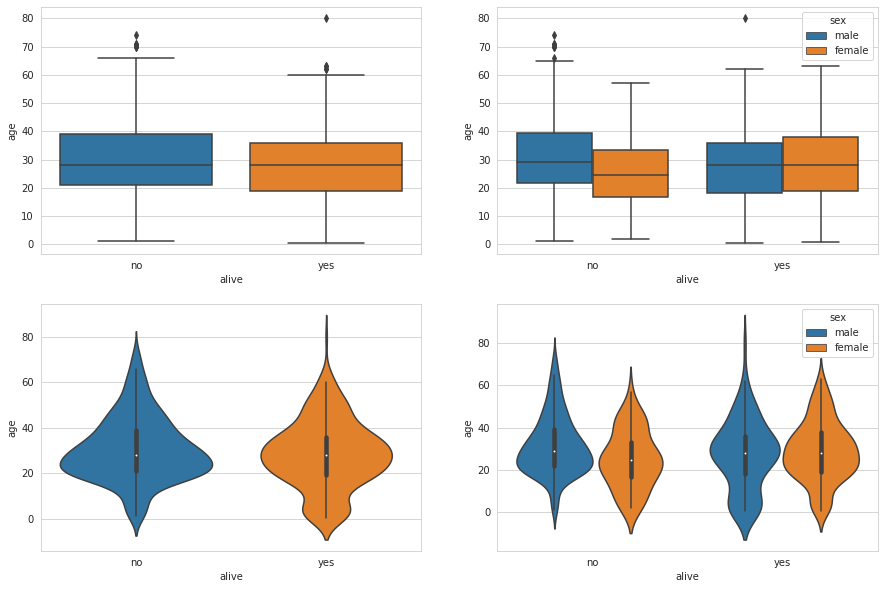

In [23]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)

sns.boxplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax2)

sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)

sns.violinplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax4)

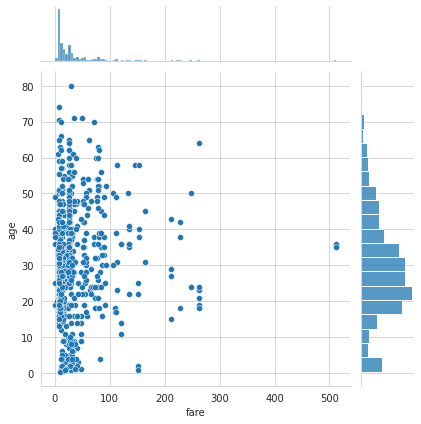

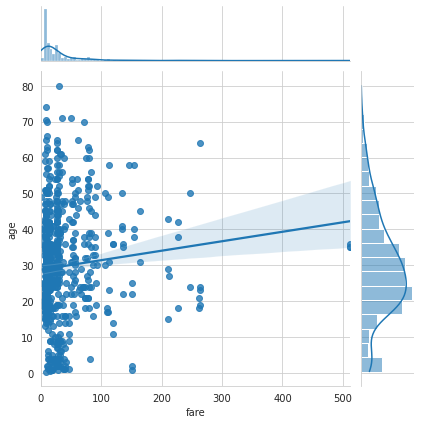

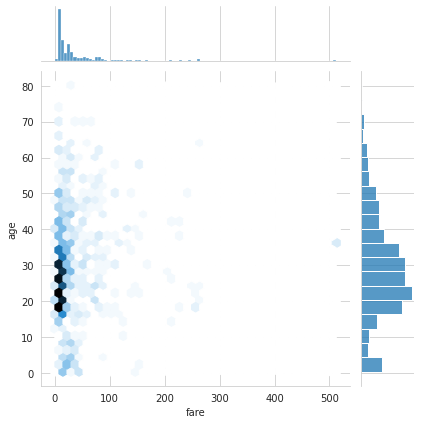

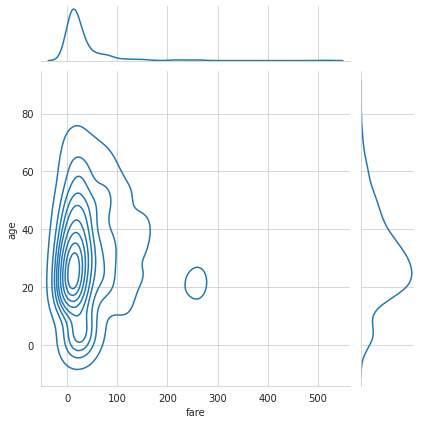

In [25]:
j1 = sns.jointplot(x = 'fare', y = 'age', data =titanic)
j2 = sns.jointplot(x = 'fare', y = 'age',kind = 'reg',data =titanic)
j3 = sns.jointplot(x = 'fare', y = 'age',kind = 'hex',data =titanic)
j4 = sns.jointplot(x = 'fare', y = 'age',kind = 'kde',data =titanic)

조건에 맞게 화면 분할

원하는 변수를 여러개 설정해서 데이터 분포를 함께 사용할 때 보면 좋을 듯!!!

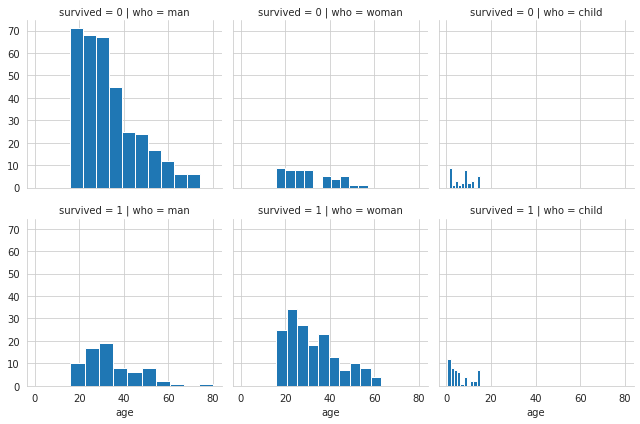

In [26]:
g = sns.FacetGrid(data = titanic, col = 'who', row = 'survived')

g = g.map(plt.hist, 'age')